In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
#Import data set 
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'
titanic = pd.read_csv(url)


In [9]:
# Look at dataset and columns
print(titanic)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [10]:
# Check columns and datatypes to work with 
print(titanic.dtypes)

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object


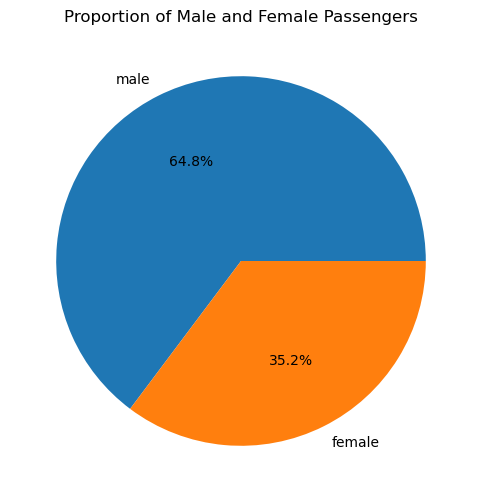

In [6]:
#Question 1
# Count the number of male and female passengers
gender_counts = titanic['sex'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Male and Female Passengers')
plt.show()

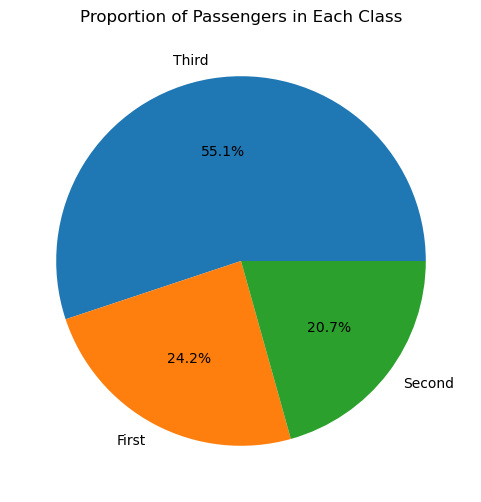

In [11]:
#Question 2
# Count the number of passengers in each class
class_counts = titanic['class'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Passengers in Each Class')
plt.show()

Question 3
I am using a scatter plot to visualise the distribution and look for patterns of correlation, between the fare and age of passengers. 

On the x-axis we have the age, and y axis we have the fare. Each point on the graph shows what age the individual passenger was and what fare they paid.

From looking at the plot there are a few assumptions that can be made. Firstly we can see a wide range of ages amongst the passengers, potentially representing diversity (in age). Additionally, most of the fares are at the lower end of the price scale, suggesting the majority of passengers paid for the cheaper ticket, regardless of age - however, there are a few outliers where the price is a lot higher, suggesting some passengers paid more and again this appears to be across a wide range of ages. Finally, there does not seem to be a correlation between fare price and passenger age.

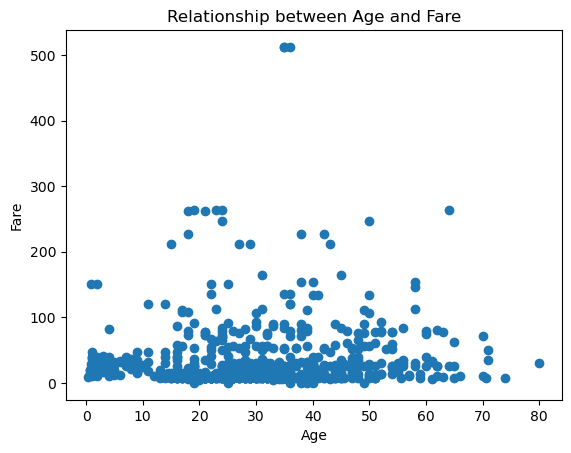

In [12]:
# Filtering the dataset to include non-null values for age and fare columns
filtered_titanic = titanic[['age', 'fare']].dropna()

# Create the scatter ploy
plt.scatter(filtered_titanic['age'], filtered_titanic['fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Relationship between Age and Fare')
plt.show()

Question 4, 

To be able to compare the survival ratio by age, sex, and class, I am going to use a grouped barchart. This will allow me to compare the survuival ratios across all the variables. 
 
Interpretation under graphs.

In [46]:
### Summary stats, I am adding a new column toadd ages to new age groups as a new category.

# Define the age groups
age_groups = pd.cut(titanic['age'], bins=[0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99], labels=['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99'])

# Add the age groups as a new column to the DataFrame
titanic['age_group'] = age_groups

# Filter data for females and males
female_data = titanic[titanic['sex'] == 'female']
male_data = titanic[titanic['sex'] == 'male']

# Calculate the survival ratio by age group and class for females and males
female_survival_ratio = female_data.groupby(['age_group', 'class'])['survived'].mean().unstack()
male_survival_ratio = male_data.groupby(['age_group', 'class'])['survived'].mean().unstack()

# Summary statistics for females and males
female_summary = female_survival_ratio.describe()
male_summary = male_survival_ratio.describe()

# Print the summary statistics for females and males
print("Summary Statistics for Survival Ratio by Age Group and Class - Females:")
print(female_summary)

print("Summary Statistics for Survival Ratio by Age Group and Class - Males:")
print(male_summary)

Summary Statistics for Survival Ratio by Age Group and Class - Females:
class     First    Second     Third
count  7.000000  6.000000  6.000000
mean   0.836310  0.925752  0.497808
std    0.370425  0.067173  0.318258
min    0.000000  0.833333  0.000000
25%    0.927083  0.885000  0.449093
50%    1.000000  0.920588  0.503840
75%    1.000000  0.985294  0.537202
max    1.000000  1.000000  1.000000
Summary Statistics for Survival Ratio by Age Group and Class - Males:
class     First    Second     Third
count  9.000000  8.000000  8.000000
mean   0.462601  0.206888  0.108000
std    0.349634  0.338838  0.127992
min    0.000000  0.000000  0.000000
25%    0.266667  0.000000  0.000000
50%    0.400000  0.098387  0.087619
75%    0.521739  0.177083  0.152423
max    1.000000  1.000000  0.380952


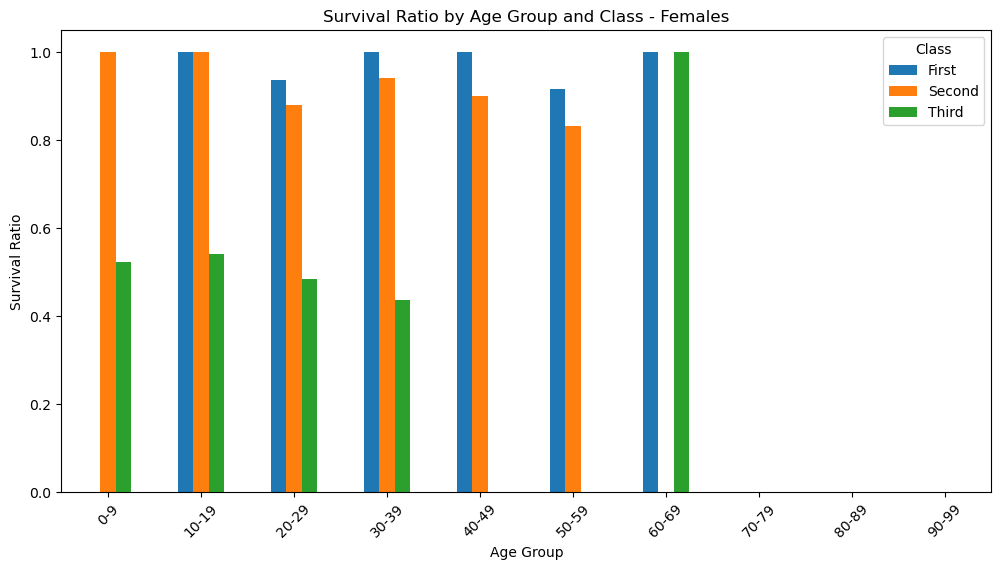

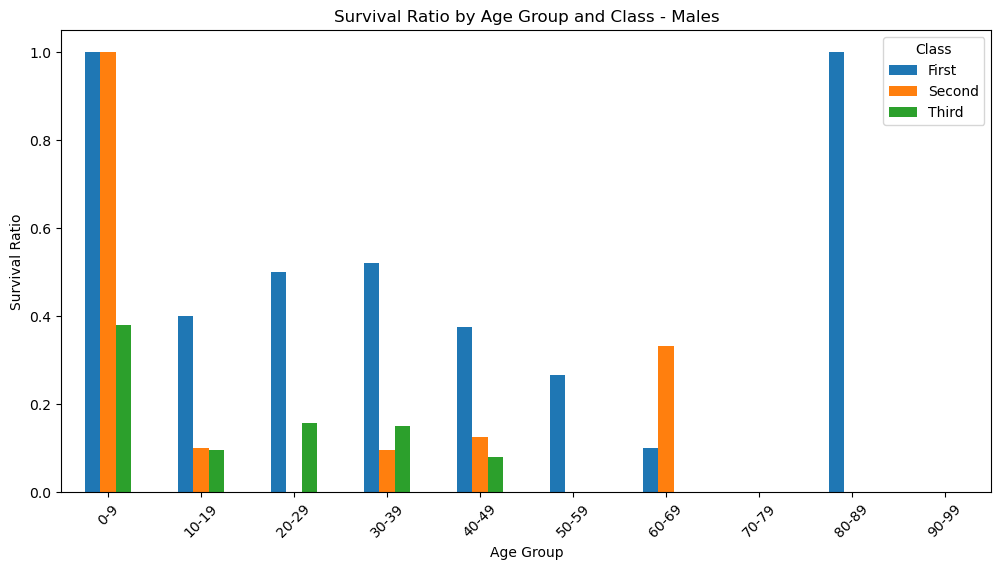

In [44]:

# Plotting the survival ratio by age group and class for females
female_survival_ratio.plot(kind='bar', figsize=(12, 6))
plt.title('Survival Ratio by Age Group and Class - Females')
plt.xlabel('Age Group')
plt.ylabel('Survival Ratio')
plt.xticks(rotation=45)
plt.legend(title='Class')
plt.show()

# Plotting the survival ratio by age group and class for males
male_survival_ratio.plot(kind='bar', figsize=(12, 6))
plt.title('Survival Ratio by Age Group and Class - Males')
plt.xlabel('Age Group')
plt.ylabel('Survival Ratio')
plt.xticks(rotation=45)
plt.legend(title='Class')
plt.show()

Interpretations that we can get from these graphs.

- Firstly by examining the summary stas, we can see that females had a much higher survival ratio across all classes.

- By looking only at the female graph, we can compare class of females by age group. It is quite clear the First and Second class had higher survival rates across all ages groups (0-9 not included in first class as there were zero). This suggests that class played an important role in survival regardless of age.

- Similarly looking at the male graph, its clear that first class males of all ages groups had a much higher survival rate than second or third class. Interestingly third class had higher survival rates than second in the 30-39 age group. Although this could be due to sample number.